In [83]:
!pip install pmdarima

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.


In [84]:
!pip install --upgrade numpy

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.


In [85]:
import pandas as pd
import numpy as np

In [86]:
import pmdarima

In [87]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [89]:
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [90]:
df.rename(columns = {'Thousands of Passengers': 'Traffic'},inplace=True)

In [91]:
df=df.dropna()

In [92]:
df.head(2)

,Traffic
Month,
1949-01-01,112
1949-02-01,118


In [93]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [94]:
# setting the frequency to 'MS'
df.index.freq = 'MS'

In [95]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

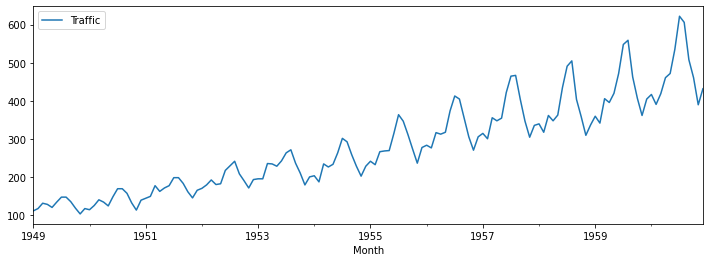

In [96]:
df.plot();

##### Check Seasonality using ETS decompose

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose

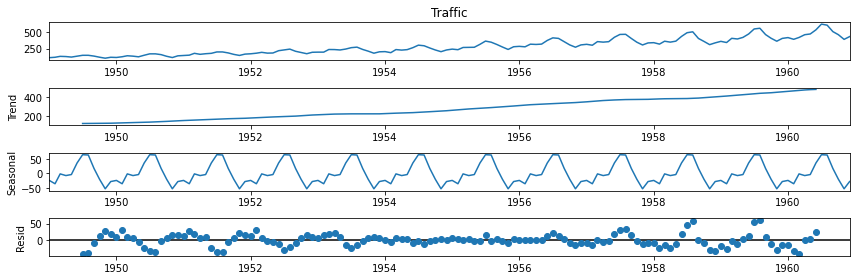

In [98]:
result = seasonal_decompose(df['Traffic'])
result.plot();

We observe that we do have seasonality in our data. But for now we will ignore it and train our model using ARIMA , with seasonality = False to see hwo how ARIMA itself performs on the dataset.

##### Check Stationarity

In [99]:
from statsmodels.tsa.stattools import adfuller

In [100]:
pvalue = adfuller(df['Traffic'])[1]
pvalue

0.991880243437641

The p-value does not provide enough evidence to reject the null-hypothesis . Therefore we can conclude that the data is non-stationary

We will use the auto_arima function method from pmdarima to do a gridsearch on the p,d and q parameters on the ARIMA model

In [101]:
from pmdarima.arima import auto_arima

In [102]:
stepwise_fit = auto_arima(df['Traffic'],start_p=0,start_q=0,max_p=5,max_q=3,
                         seasonal=False,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

This gives us the ARIMA(4,1,3) model as our best fit

Let us now divide our data set into train and test sets and train and test this model

In [103]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -674.913
Date:                Wed, 01 Dec 2021   AIC                           1365.825
Time:                        11:02:25   BIC                           1389.528
Sample:                             0   HQIC                          1375.457
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.332      -0.126       0.374
ar.L4         -0.5213      0.085     -6.136      0.000      -0.688      -0.355
ma.L1          0.9069      0.094      9.657      0.000       0.723       1.091
ma.L2         -0.5590      0.145     -3.866      0.000      -0.842      -0.276
ma.L3         -0.7385      0.109     -6.778      0.000      -0.952      -0.525
sigma2       724.1714     85.615      8.458      0.000     556.368     891.974
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                14.59
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               5.66   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
from statsmodels.tsa.arima_model import ARIMA

In [106]:
train_df = df[:132]
test_df = df[132:]

In [107]:
model = ARIMA(train_df['Traffic'],order=(4,1,3))

In [108]:
result = model.fit()

In [109]:
start = len(train_df)
end = len(train_df) + len(test_df) -1

In [110]:
predictions = result.predict(start=start,end=end,typ='levels').rename('ARIMA_predictions')

We use typ='levels' so that the results are in terms of original data, not the differenced data

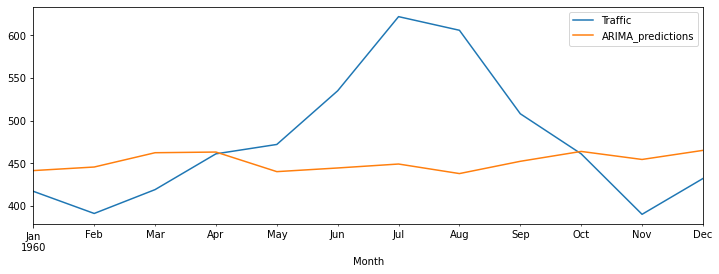

In [111]:
test_df['Traffic'].plot(legend=True);
predictions.plot(legend=True);

###### From the figure , we see that our ARIMA model gives about an average value for the timeseries, but does not capture the trend of the series very well. This could be due to the fact that we have ignored the seasonality in our data.<br>


##### Root Mean Square Error

In [112]:
from statsmodels.tools.eval_measures import rmse

In [113]:
error = rmse(test_df['Traffic'],predictions)

In [114]:
error

82.27588205989339

In [115]:
test_df['Traffic'].describe()

count     12.000000
mean     476.166667
std       77.737125
min      390.000000
25%      418.500000
50%      461.000000
75%      514.750000
max      622.000000
Name: Traffic, dtype: float64

So we observe that the error is almost same as the std of the distribution of the test data and is about 5 times lesser than the mean of the test values. So our model is not bad, but not very performant either.

###  SARIMAX

In [116]:
stepwise_fit = auto_arima(df['Traffic'],start_p=0,start_q=0,max_p=5,max_q=3,
                         seasonal=True,trace=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.30 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.62 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.22 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.18 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.37 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.39 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.26 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.07 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.12 sec
 ARIMA(0,1,1)(1,1,1)[12]     

The 'm' parameter denoted the frquency for the seasonality of our data. Since our data is monthly , with patterns repeating after every 12 months, we take m=12

The best model is ARIMA(0,1,1)(2,1,0)[12]. Train and fit this onto our training data.

In [117]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [118]:
model = SARIMAX(train_df['Traffic'],order=(0,1,1),seasonal_order=(2,1,0,12))

In [119]:
results = model.fit()

In [120]:
predictions = results.predict(start,end,typ='levels').rename('SARIMAX_predictions')

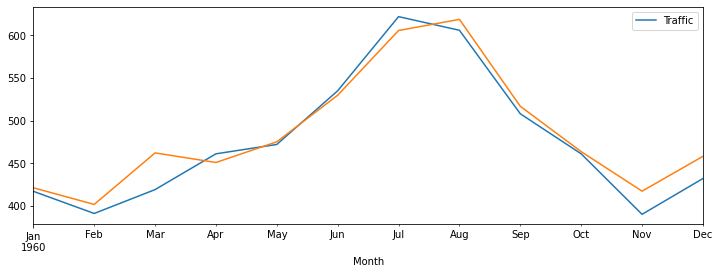

In [124]:
test_df.plot();
predictions.plot();

#### WE see that when we take seasonality into account, the predictions curve is quite in sinc with our original test data. Lets check the error 

In [125]:
error = rmse(test_df['Traffic'],predictions)

In [126]:
error

18.380777716328872

This is about one-fourth of the std of the test data. 

Now we can do forescating using this model and check the results

## Forecasting

For forecasting we will train the data on our full data set first

In [128]:
model = SARIMAX(df['Traffic'],order=(0,1,1),seasonal_order=(2,1,0,12))

In [129]:
results = model.fit()

Forecast one year into the future

In [177]:
forecast = results.predict(len(df),len(df)+11,typ='levels')

In [178]:
forecast

1961-01-01    451.347077
1961-02-01    427.102222
1961-03-01    463.382490
1961-04-01    499.705771
1961-05-01    514.035525
1961-06-01    571.851867
1961-07-01    661.310508
1961-08-01    648.081675
1961-09-01    551.284691
1961-10-01    501.068279
1961-11-01    434.052984
1961-12-01    479.233768
Freq: MS, Name: predicted_mean, dtype: float64

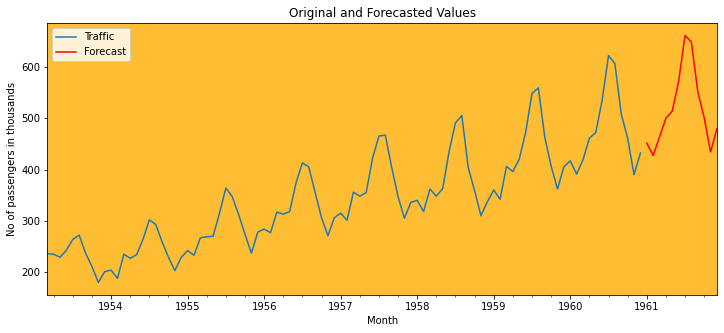

In [176]:
ax = df['Traffic'][50:].plot(legend=True,figsize=(12,5));
forecast.plot(label='Forecast',legend=True,ax=ax,color='red');
ax.set_facecolor((1.0, 0.74, 0.20));
ax.set_ylabel("No of passengers in thousands");
ax.set_title("Original and Forecasted Values");


We can see that the forecast follows the trend of our timeseries quite closely